# General statistics

* [total views](#total-views)
* [views per year](#views-per-year)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from mfnf import MFNF

def md(text):
    display(Markdown(text))

df = MFNF().aggregate_pageviews()

## <span id="total-views">Total views (starting from 2016-01-01)</span>
### Total views of complete project

In [2]:
total_views = df["views"].sum()

md(f"**Total views: {total_views:,}**")

**Total views: 19,799,325**

## Total views per book

In [3]:
views_per_book = df[["book_name", "views"]].groupby("book_name").sum()
views_per_book.sort_values(by="views", inplace=True, ascending=False)
views_per_book["views"] = views_per_book["views"].apply(lambda x: f"{x:,}")
display(views_per_book)

,views
book_name,
Analysis 1,"10,405,977"
Grundlagen der Mathematik,"5,527,625"
Lineare Algebra 1,"2,682,087"
Real Analysis,"305,749"
Mitmachen für (Nicht-)Freaks,"146,101"
Buchanfänge,"83,700"
Maßtheorie,"81,887"
Linear algebra,"64,126"
Über das Projekt,"59,098"


## <span id="views-per-year">Views per year</span>
### Total views per year

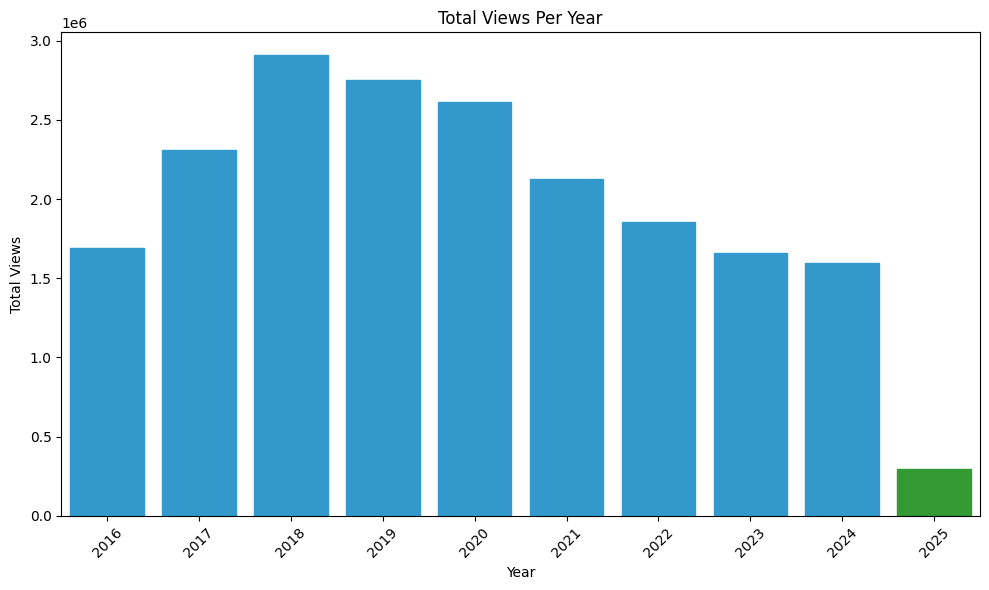

In [17]:
def show_total_views_per_year(df):
    df['year'] = df['timestamp'].dt.year
    
    # Aggregate views by year
    yearly_views = df.groupby('year')['views'].sum().reset_index()
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=yearly_views, x='year', y='views')
    
    # Customize the last bar with a different color
    ax = plt.gca()
    for patch in ax.patches[:-1]:
        patch.set_color((0.2, 0.6, 0.8))  # Set a different color for all but the last bar
    ax.patches[-1].set_color((0.2, 0.6, 0.2))  # Set the last bar to a distinct color
    
    # Add plot labels and title
    plt.title('Total Views Per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Views')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.tight_layout()
    plt.show()

show_total_views_per_year(df.copy())